In [1]:
from drive.MyDrive.datas.module.preprocess import *
from drive.MyDrive.datas.module.setting_tf import *
from drive.MyDrive.datas.module.visualization import *

In [2]:
get_dataset(only_unzip=True)

complete unzip


In [3]:
train_path = "/content/Dataset/train"
valid_path = "/content/Dataset/valid"

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 shuffle=True,
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

valid_set = valid_datagen.flow_from_directory(valid_path, 
                                              shuffle=True,
                                              target_size = (299, 299),
                                              batch_size = 32,
                                              class_mode = 'binary')

Found 7041 images belonging to 2 classes.
Found 3010 images belonging to 2 classes.


In [5]:
TRAIN_STEPS = len(training_set)
VALID_STEPS = len(valid_set)

print(TRAIN_STEPS, VALID_STEPS)

221 95


In [6]:
name = "inception_v3"
base_model = load_base_model(name, input_shape=(299, 299, 3), trainable=False)

model = make_network(base_model, name)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 2048)              21802784  
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 22,919,673
Trainable params: 1,116,889
Non-trainable params: 21,802,784
____________________________________

In [7]:
monitor_ls = ["val_accuracy", "val_loss"]
callbacks = setting_callback("inception_v3", monitors=monitor_ls)

In [ ]:
history = model.fit_generator(training_set, steps_per_epoch = TRAIN_STEPS,
                              validation_data = valid_set, validation_steps = VALID_STEPS,     
                              epochs = 150, callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/150
221/221 [==============================] - 60s 177ms/step - loss: 0.4177 - accuracy: 0.8225 - val_loss: 0.3000 - val_accuracy: 0.8827

Epoch 00001: val_accuracy improved from -inf to 0.88272, saving model to /content/drive/MyDrive/datas/model_result/incepv3_acc.h5

Epoch 00001: val_loss improved from inf to 0.30005, saving model to /content/drive/MyDrive/datas/model_result/incepv3_loss.h5
Epoch 2/150
221/221 [==============================] - 38s 172ms/step - loss: 0.2706 - accuracy: 0.8980 - val_loss: 0.2826 - val_accuracy: 0.8960

Epoch 00002: val_accuracy improved from 0.88272 to 0.89601, saving model to /content/drive/MyDrive/datas/model_result/incepv3_acc.h5

Epoch 00002: val_loss improved from 0.30005 to 0.28258, saving model to /content/drive/MyDrive/datas/model_result/incepv3_loss.h5
Epoch 3/150
221/221 [==============================] - 38s 173ms/step - loss: 0.2219 - accuracy: 0.9193 - val_loss: 0.2888 - val_accuracy: 0.8874

Epoch 00003: val_accuracy did not impr

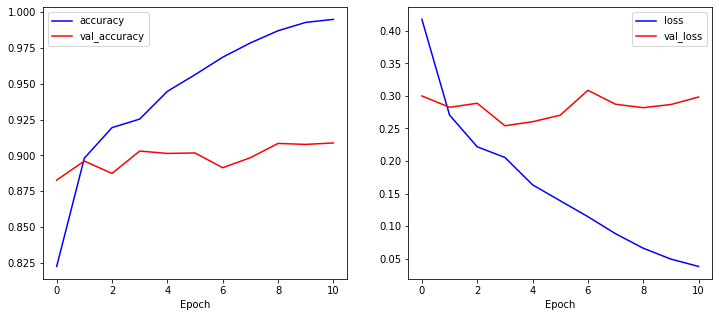

In [ ]:
make_scores_graph(history=history)